In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Step 1: Load the data
data = pd.read_csv("/Users/yashaswipatki/Downloads/housing.csv")
print("First few rows of the data:")
data.head()

First few rows of the data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [24]:
# Step 2: Handle missing values
data.fillna(data.mean(), inplace=True)

/var/folders/0r/hpvzswss2wnfzk1f7lzvn2m40000gn/T/ipykernel_4217/109595775.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [25]:
print(data.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [34]:
# Step 3: Encode categorical data
#data = pd.get_dummies(data, columns=['ocean_proximity_INLAND'], drop_first=True)
# Drop the original 'ocean_proximity' column
data = data.drop('ocean_proximity', axis=1)


In [35]:
# Step 4: Split the dataset
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Step 5: Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Step 6: Perform Linear Regression
linear_reg = LinearRegression()

# Fit the Linear Regression model on training data
linear_reg.fit(X_train_scaled, y_train)

# Predict output for test dataset using the fitted model
y_pred_linear = linear_reg.predict(X_test_scaled)

# Calculate root mean squared error (RMSE)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

Root Mean Squared Error (Linear Regression): 71084.13116794515


In [38]:
# Step 7: Perform Decision Tree Regression
tree_reg = DecisionTreeRegressor()

# Fit the Decision Tree Regression model on training data
tree_reg.fit(X_train_scaled, y_train)

# Predict output for test dataset using the fitted model
y_pred_tree = tree_reg.predict(X_test_scaled)

# Calculate root mean squared error (RMSE) for Decision Tree Regression
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print("Root Mean Squared Error (Decision Tree Regression):", rmse_tree)


Root Mean Squared Error (Decision Tree Regression): 69656.41876275284


In [39]:
# Step 8: Perform Random Forest Regression
forest_reg = RandomForestRegressor()

# Fit the Random Forest Regression model on training data
forest_reg.fit(X_train_scaled, y_train)

# Predict output for test dataset using the fitted model
y_pred_forest = forest_reg.predict(X_test_scaled)

# Calculate root mean squared error (RMSE) for Random Forest Regression
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print("Root Mean Squared Error (Random Forest Regression):", rmse_forest)

Root Mean Squared Error (Random Forest Regression): 49989.09509584306


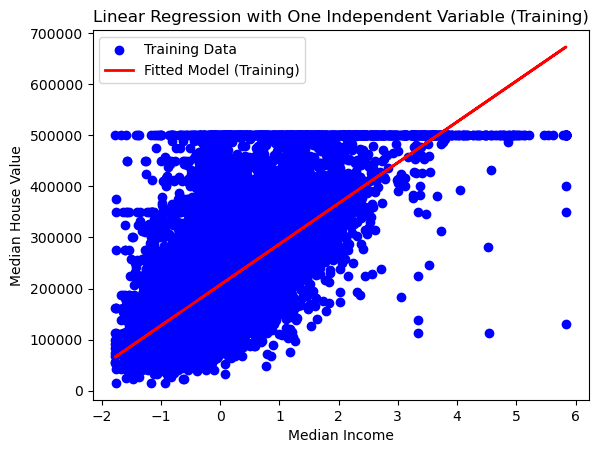

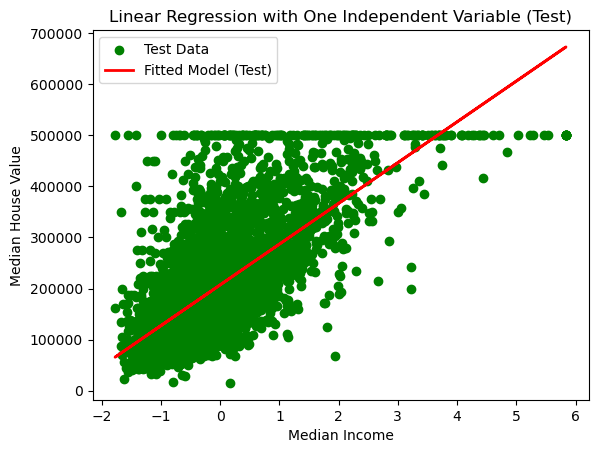

In [40]:
# 9: Extract median_income column from the independent variables for training and test data
median_income_train = X_train_scaled[:, X.columns.get_loc('median_income')]
median_income_test = X_test_scaled[:, X.columns.get_loc('median_income')]

# Perform Linear Regression with one independent variable
linear_reg_single_var = LinearRegression()
linear_reg_single_var.fit(median_income_train.reshape(-1, 1), y_train)

# Predict output for test dataset using the fitted model
y_pred_single_var = linear_reg_single_var.predict(median_income_test.reshape(-1, 1))

# Plot the fitted model for training data
plt.scatter(median_income_train, y_train, color='blue', label='Training Data')
plt.plot(median_income_train, linear_reg_single_var.predict(median_income_train.reshape(-1, 1)), color='red', linewidth=2, label='Fitted Model (Training)')
plt.title('Linear Regression with One Independent Variable (Training)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

# Plot the fitted model for test data
plt.scatter(median_income_test, y_test, color='green', label='Test Data')
plt.plot(median_income_test, y_pred_single_var, color='red', linewidth=2, label='Fitted Model (Test)')
plt.title('Linear Regression with One Independent Variable (Test)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()
